<a href="https://clarusway.com/contact-us/"><img align="center" src="https://i.ibb.co/B43qn24/officially-licensed-logo.png" alt="Open in Clarusway LMS" width="110" height="200" title="This notebook is licensed by Clarusway IT training school. Please contact the authorized persons about the conditions under which you can use or share."></a>

<hr>

<a href="https://clarusway.com/"><img align="center" src="https://i.ibb.co/Rpz9L36/clarusway-logo-black.png" width="450" height="200" alt="CLRSWY_LOGO" title="Open and Execute in Google Colaboratory"></a><br/>

<p style="background-color:#E51A59; font-family:newtimeroman; color:#FDFEFE; font-size:130%; text-align:center; border-radius:10px 10px;">WAY TO REINVENT YOURSELF</p>

<p style="text-align: center;"><img src="https://i.ibb.co/Vp7VhzT/stats.png" class="img-fluid" 
alt="STATS" width="600" height="200"></p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#0000FF; font-size:200%; text-align:center; border-radius:10px 10px;">SESSION-03 (Correlation & Normal Distribution)</p>

<hr>

## Libraries Needed in this Notebook

In [1]:
import seaborn as sns  
import matplotlib.pyplot as plt
import numpy as np   
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

**[How to Enable and Use Autocomplete in Jupyter Notebook](https://linuxhint.com/enable-use-autocomplete-jupyter-notebook/)**

## <p style="background-color:#E51A59; font-family:newtimeroman; color:#FDFEFE; font-size:175%; text-align:center; border-radius:10px 10px;">How to Calculate Correlation in Numpy?</p>

**Create an array of x including integers between 5 (inclusive) and 15 (exclusive).** Use **[np.arange()](https://numpy.org/doc/stable/reference/generated/numpy.arange.html)**

``numpy.arange([start, ]stop, [step, ]dtype=None, *, like=None)``
  - Return evenly spaced values within a given interval.

In [2]:
x = np.arange(5, 15)

print("x: ", x)

x:  [ 5  6  7  8  9 10 11 12 13 14]


**Then use np.array() to create the second array of y containing 10 arbitrary integers.**

In [3]:
y = np.array([1, 5, 7, 11, 9, 22, 19, 25, 29, 15])

print("y: ", y)

y:  [ 1  5  7 11  9 22 19 25 29 15]


💥 **CRITICAL NOTE:** To perform a correlation between two variables, it is 🧐 **``typically necessary for the data to have the same length``**. This stems from the fact that each data point is paired, and an equal number of data points in each variable is required to calculate the correlation coefficient effectively. However, some statistical methods allow for unequal lengths, but it is essential to know that missing data might affect the results. To ensure reliable results, it's best to ensure both datasets share the same number of observations when available. If data lengths must differ, consider strategies such as time series block analysis, where the data can be broken down into smaller, but equal-sized blocks for correlation analysis.

**Once you have two arrays of the same length, you can compute the correlation coefficient between x and y:**

**[numpy.corrcoef()](https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html)**

``numpy.corrcoef(x, y=None, rowvar=True, bias=<no value>, ddof=<no value>, *, dtype=None)``

In [4]:
corr = np.corrcoef(x, y)
corr
print("Correlation between the arrays of x and y is:", corr[0][1], "\n", corr)

Correlation between the arrays of x and y is: 0.8362117068898693 
 [[1.         0.83621171]
 [0.83621171 1.        ]]


- **``Diagonal Elements:``**
  - The diagonal elements (1.0) represent the correlation of each variable with itself. Therefore:
     - **``Correlation of x with x``**: 1.0
     - **``Correlation of y with y``**: 1.0
- **``Off-Diagonal Elements:``**
     - **``The off-diagonal elements (0.83621171) represent the correlation between x and y``**:
     - **``Correlation of x with y``**: 0.8362 (approximately)
<hr>

- **``What the Correlation Coefficient Indicates?``**
  - **``Value Range``**: Correlation coefficients range from -1 to 1.
     - **``1``**: Perfect positive linear correlation.
     - **``0``**: No linear correlation.
     - **``-1``**: Perfect negative linear correlation.
- **``Interpretation of 0.8362:``**
   - A correlation of 0.8362 suggests a **``strong positive linear``** relationship between x and y. 
     - As one variable increases, the other tends to increase as well.

## <p style="background-color:#E51A59; font-family:newtimeroman; color:#FDFEFE; font-size:175%; text-align:center; border-radius:10px 10px;">How to Calculate & Visualize Correlation in Pandas?</p>

## Load Dataset

**Let's get the names of built-in datasets in Seaborn library:**

In [5]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

**Let's pick up one (``mpg``) among them and assign it to an object named df after loading via [load_dataset()](https://seaborn.pydata.org/generated/seaborn.load_dataset.html) function:**

``seaborn.load_dataset(name, cache=True, data_home=None, **kws)``<br>
  - Load an example dataset from the online repository (requires internet).

In [6]:
df = sns.load_dataset("mpg")

The **``"mpg"``** dataset, available from the Seaborn library, contains information about various cars and their fuel efficiency. Here’s a brief overview of the dataset:

- **``Overview of the mpg Dataset:``**
  - **``Source``**: The dataset comes from the UCI Machine Learning Repository and includes data on different car models from the 1970s and 1980s.
  - **``Columns:``**
    - **``mpg``**: Miles per gallon (fuel efficiency).
    - **``cylinders``**: Number of cylinders in the engine.
    - **``displacement``**: Engine displacement (in cubic inches).
    - **``horsepower``**: Engine horsepower.
    - **``weight``**: Weight of the car (in pounds).
    - **``acceleration``**: Acceleration time from 0 to 60 mph (in seconds).
    - **``model_year``**: Year of the car model (1970-1982).
    - **``origin``**: Origin of the car (1 for American, 2 for European, 3 for Japanese).
    - **``name``**: Name of the car model.
- **``Key Features:``**
  - **``Fuel Efficiency``**: The mpg column is particularly useful for analyzing fuel efficiency across different makes and models of cars.
  - **``Categorical and Continuous Variables``**: The dataset contains both categorical variables (like origin) and continuous variables (like weight, horsepower, etc.), making it suitable for various types of analysis and visualization.
- **``Potential Analyses:``**
  - **``Correlation Analysis``**: You can explore how different factors (like weight, horsepower, and number of cylinders) correlate with fuel efficiency.
  - **``Visualizations``**: You can create scatter plots, box plots, and histograms to visualize relationships and distributions within the data.
  - **``Regression Models``**: The dataset is often used to build regression models to predict mpg based on other features.

**Let's check the first 3 rows:**

In [7]:
df.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite


**Let's check the last 3 rows:**

In [8]:
df.tail(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger
397,31.0,4,119.0,82.0,2720,19.4,82,usa,chevy s-10


**Let's explore Descriptive Statistics:**

Descriptive statistics in Pandas are used to summarize and describe the main characteristics of a dataset. Pandas provides a variety of functions to calculate descriptive statistics for a DataFrame or a Series, including measures of central tendency, measures of variability, and measures of distribution.

Some **<u>commonly used descriptive statistics functions</u>** in Pandas include:

  - **[mean()](https://pandas.pydata.org/docs/reference/api/pandas.Series.mean.html)**: calculates the arithmetic mean or average of a dataset
  - **[median()](https://pandas.pydata.org/docs/reference/api/pandas.Series.median.html)**: calculates the median or middle value of a dataset
  - **[mode()](https://pandas.pydata.org/docs/reference/api/pandas.Series.mode.html)**: calculates the mode or most frequently occurring value in a dataset
  - **[std()](https://pandas.pydata.org/docs/reference/api/pandas.Series.std.html)**: calculates the standard deviation of a dataset
  - **[var()](https://pandas.pydata.org/docs/reference/api/pandas.Series.var.html)**: calculates the variance of a dataset
  - **[min()](https://pandas.pydata.org/docs/reference/api/pandas.Series.min.html)**: returns the minimum value in a dataset
  - **[max()](https://pandas.pydata.org/docs/reference/api/pandas.Series.max.html)**: returns the maximum value in a dataset
  - **[count()](https://pandas.pydata.org/docs/reference/api/pandas.Series.count.html)**: returns the number of non-NaN values in a dataset
  - **[describe()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)**: provides a summary of the distribution of a dataset, including the count, mean, standard deviation, minimum, maximum, and quartile values
  
Descriptive statistics are useful for gaining a general understanding of the data and for identifying any patterns or outliers in the dataset. They are often used in exploratory data analysis to summarize the data before proceeding with more advanced statistical analyses.

In [9]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


- The **``"mpg"``** dataset contains 398 entries and 9 columns, representing various attributes of cars from the 1970s and 1980s. 
- Key columns include mpg (miles per gallon), cylinders, displacement, horsepower (with 6 missing values), weight, acceleration, model_year, origin (categorical), and name. 
- The dataset primarily consists of numerical data types (float64 and int64) and occupies approximately 28.1 KB in memory.
- The dataset contains 6 missing values in the horsepower column, which can affect analyses and visualizations. 

### Let's Remember Scatter Plot:

A scatter plot is a type of data visualization that displays the relationship between two variables in a dataset. It is a graph in which the values of two variables are plotted as points on a two-dimensional plane, with one variable on the x-axis and the other variable on the y-axis.

The scatter plot is useful for several purposes in data analysis, including:

  - **``Identifying relationships``**: The scatter plot can be used to identify whether there is a relationship between two variables. If the points on the plot are clustered in a particular pattern, it indicates a relationship between the variables.

  - **``Visualizing data``**: The scatter plot provides a visual representation of the data, which can be useful in identifying patterns or outliers in the data.

  - **``Outlier detection``**: The scatter plot can be used to identify outliers in the data. Outliers are data points that are far away from the other points on the plot and may warrant further investigation.

  - **``Model selection``**: The scatter plot can be used to select an appropriate model for the data. For example, if the points on the plot form a linear pattern, a linear regression model may be appropriate.
  
<p style="text-align: center;"><img src="https://i.ibb.co/K9y75zt/Patterns-in-Scetter-Plot.png" class="img-fluid" 
alt="SCATTER PLOT PATTERNS" width="500" height="200"></p>  

#### SCATTER PLOT EXAMPLE-01 (Basic Scatter Plot):

**What is the correlation coefficient value between the ``"mpg"`` and ``"horsepower"`` columns in the DataFrame at hand?**

In [11]:
df["mpg"].corr(df["horsepower"])

-0.7784267838977761

- The correlation coefficient of approximately **``-0.7784``** between the **``mpg``** (miles per gallon) and **``horsepower``** variables indicates a **``strong negative linear relationship``**.
  - This means that **``as horsepower increases, mpg tends to decrease``**. In practical terms, cars with higher horsepower generally have lower fuel efficiency (miles per gallon).

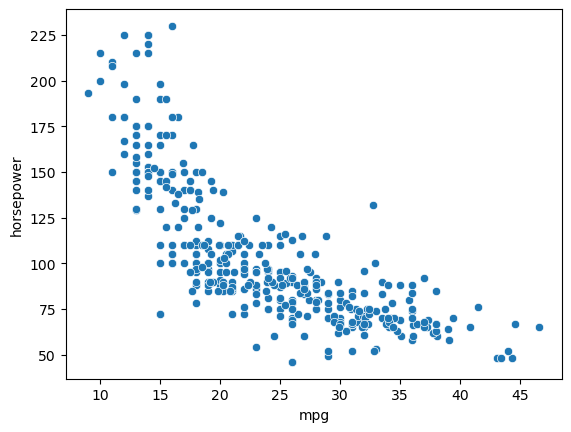

In [12]:
sns.scatterplot(x="mpg", y="horsepower", data=df);

#### SCATTER PLOT EXAMPLE-02 (Customized Scatter Plot - REGPLOT):

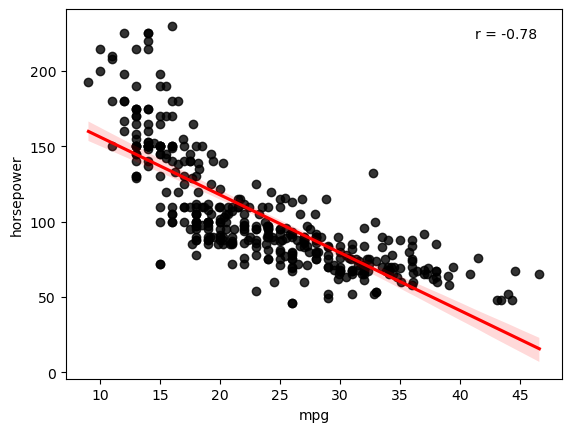

In [13]:
# sns.set(style="ticks", color_codes=True)

# Plot scatterplot with regression line
sns.regplot(x="mpg", y="horsepower", data=df, color="red", scatter_kws={"color": "black"})

# Calculate Pearson correlation coefficient
corr_coef = df["mpg"].corr(df["horsepower"])
plt.annotate("r = {:.2f}".format(corr_coef), xy=(0.95, 0.95), xycoords="axes fraction", ha="right", va="top")

# Show the plot
plt.show()

This seaborn scatter plot visualizes the relationship between the **``"mpg"``** and **``"horsepower"``** columns in the DataFrame. 
- The **``"mpg"``** values are plotted on the **x-axis**, and the **``"horsepower"``** values are plotted on the **y-axis**. 
- Each point on the plot represents a data point in the dataset, and the position of the point represents the corresponding "mpg" and "horsepower" values.

## 01 - Correlation Calculation in ``Pandas Series``:

**[pandas.Series.corr](https://pandas.pydata.org/docs/reference/api/pandas.Series.corr.html)** is used to compute correlation with other Series, excluding missing values.

``Series.corr(other, method='pearson', min_periods=None)``

#### CORRELATION EXAMPLE-01: "acceleration" vs. "horsepower"

**What is the correlation coefficient value between the ``"acceleration"`` and ``"horsepower"`` columns in the DataFrame at hand?**

In [14]:
df["acceleration"].corr(df["horsepower"])

-0.6891955103342365

- The correlation coefficient of approximately **``-0.6892``** between the **``"acceleration"``** and **``"horsepower"``** variables indicates a **``strong negative linear relationship``**. 
  - This means that **``as horsepower increases, acceleration tends to decrease``**. In practical terms, cars with higher horsepower may take longer to accelerate, possibly due to factors like weight or engine design.

**How is the relationship between the "``acceleration``" and "``horsepower``" columns visualized using a scatter plot in Seaborn?**

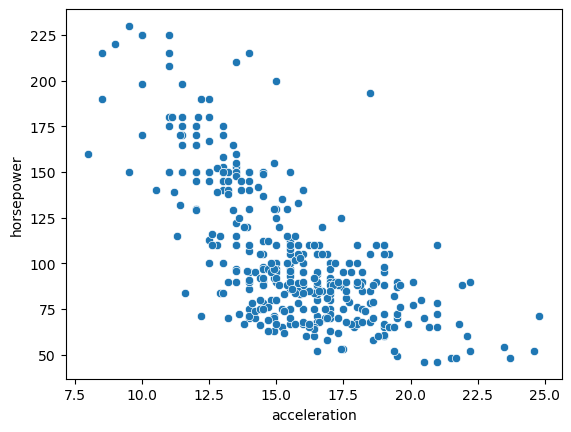

In [15]:
sns.scatterplot(x="acceleration", y="horsepower", data=df);

**Customized Scatter Plot:**

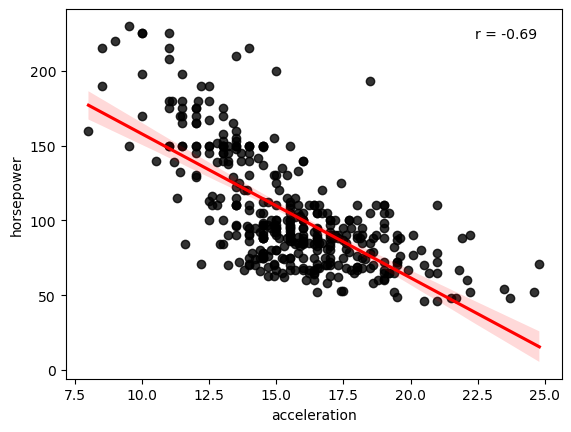

In [16]:
# sns.set(style="ticks", color_codes=True)

# Plot scatterplot with regression line
sns.regplot(x="acceleration", y="horsepower", data=df, color="red", scatter_kws={"color": "black"})

# Calculate Pearson correlation coefficient
corr_coef = df["acceleration"].corr(df["horsepower"])
plt.annotate("r = {:.2f}".format(corr_coef), xy=(0.95, 0.95), xycoords="axes fraction", ha="right", va="top")

# Show the plot
plt.show()

This seaborn scatter plot visualizes the relationship between the **``"acceleration"``** and **``"horsepower"``** columns in the DataFrame. 
- The **``"acceleration"``** values are plotted on the **x-axis**, and the **``"horsepower"``** values are plotted on the **y-axis**. 
- Each point on the plot represents a data point in the dataset, and the position of the point represents the corresponding "acceleration" and "horsepower" values.

### What does Correlation Coefficient tell?:

The correlation coefficient is a statistical measure that indicates the degree to which two variables are linearly related to each other. It is a value between -1 and 1, where 1 indicates a perfect positive correlation, -1 indicates a perfect negative correlation, and 0 indicates no correlation.

The correlation coefficient is useful for several purposes in data analysis, including:

  - **``Identifying relationships``**: The correlation coefficient can be used to identify whether there is a relationship between two variables. If the correlation coefficient is close to 1 or -1, it indicates a strong relationship, while a coefficient close to 0 indicates no relationship.

  - **``Quantifying the strength of a relationship``**: The correlation coefficient provides a quantitative measure of the strength of a relationship between two variables. A coefficient of 1 or -1 indicates a very strong relationship, while a coefficient close to 0 indicates a weak relationship.

  - **``Feature selection``**: The correlation coefficient can be used to identify highly correlated variables in a dataset. Highly correlated variables may be redundant and can be removed to simplify the dataset and improve the performance of machine learning models.

  - **``Hypothesis testing``**: The correlation coefficient can be used to test hypotheses about the relationship between variables, such as whether a correlation is significant or not.

#### CORRELATION EXAMPLE-02: ``"weight"`` vs. ``"horsepower"``

**What is the correlation coefficient value between the ``"weight"`` and ``"horsepower"`` columns in the DataFrame at hand?**

In [17]:
df["weight"].corr(df["horsepower"])

0.8645377375741443

- The correlation coefficient of approximately **``0.8645``** between the **``"weight"``** and **``"horsepower"``** variables indicates a **strong positive linear relationship**.
  - This means that **``as weight increases, horsepower also tends to increase``**. In practical terms, heavier cars are typically equipped with more powerful engines.

**How is the relationship between the "weight" and "horsepower" columns visualized using a scatter plot in Seaborn?**

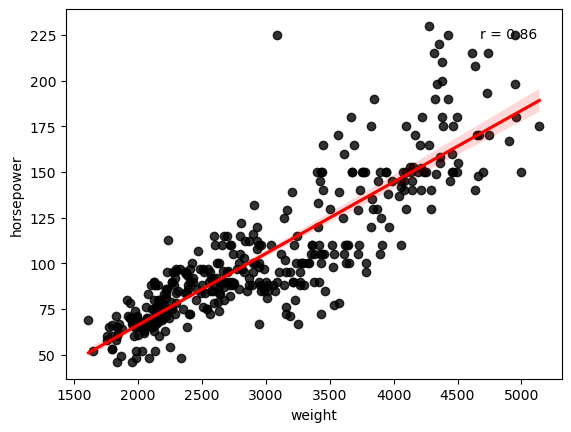

In [18]:
# sns.set(style="ticks", color_codes=True)

# Plot scatterplot with regression line
sns.regplot(x="weight", y="horsepower", data=df, color="red", scatter_kws={"color": "black"})

# Calculate Pearson correlation coefficient
corr_coef = df["weight"].corr(df["horsepower"])
plt.annotate("r = {:.2f}".format(corr_coef), xy=(0.95, 0.95), xycoords="axes fraction", ha="right", va="top")

# Show the plot
plt.show()

## 02 - Correlation Calculation in ``Pandas DataFrame``:

**[DataFrame.corr()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html)** is a function in pandas that calculates the correlation coefficient between columns of a DataFrame. The correlation coefficient is a statistical measure that indicates the degree to which two variables are linearly related to each other. The corr() function returns a correlation matrix that displays the pairwise correlation coefficients between all pairs of columns in a DataFrame by default.

``DataFrame.corr(method='pearson', min_periods=1, numeric_only=False)``

#### CORRELATION EXAMPLE-02:

In [19]:
# help(df.corr())

**The following code computes the ``correlation matrix for all numeric columns`` in the DataFrame.**
  - The **corr()** method calculates the pairwise correlation coefficients between numeric columns in the DataFrame. It measures the **``strength``** and **``direction``** of **``linear relationships``** between the variables.

In [20]:
df.corr(numeric_only=True)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


**The following code is designed to create a visually enhanced version of the correlation matrix for a DataFrame by ``colorizing the cells based on their correlation values``.**
  - The primary purpose of this code is to provide a visual representation of the correlation matrix, making it easier to quickly identify the strength and direction of the relationships between the numeric variables in the DataFrame. 
    - **``Blue``**: If the value is 1 (indicating perfect correlation).
    - **``Red``**: If the value is negative (indicating a negative correlation).
    - **``Green``**: If the value is positive but not equal to 1 (indicating a positive correlation).

In [21]:
# Colorize defined values
def highlight_corr(val):
    if val == 1:
        color = 'blue'
    elif val < 0:
        color = 'red'
    else:
        color = 'green'
    return 'color: %s' % color

# Print out colorized matrix
df.corr(numeric_only=True).style.applymap(highlight_corr)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


## <p style="background-color:#E51A59; font-family:newtimeroman; color:#FDFEFE; font-size:175%; text-align:center; border-radius:10px 10px;">Other Visualization Approaches</p>

**The following code generates a horizontal bar plot of the correlation coefficients between the mpg (miles per gallon) variable and all other numeric variables in the DataFrame.**

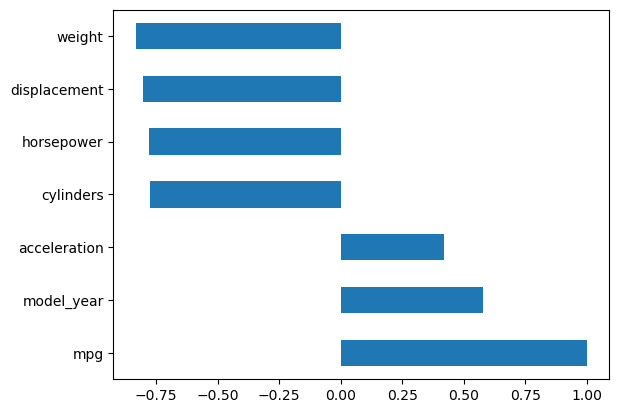

In [22]:
df.corr(numeric_only=True)["mpg"].sort_values(ascending=False).plot.barh();

### Pairplot:

- Pairplot is a function in the Seaborn library that creates a **matrix of scatterplots** and **histograms** for all pairs of numerical variables in a dataset. It is a powerful tool for visualizing relationships between variables and identifying patterns and trends in the data.

- The pairplot function creates a grid of subplots, where the diagonal subplots show histograms of each variable, and the lower and upper triangles show scatterplots of each pair of variables. By default, the scatterplots in the lower triangle show the data points, while the scatterplots in the upper triangle show the same data with a kernel density estimate.

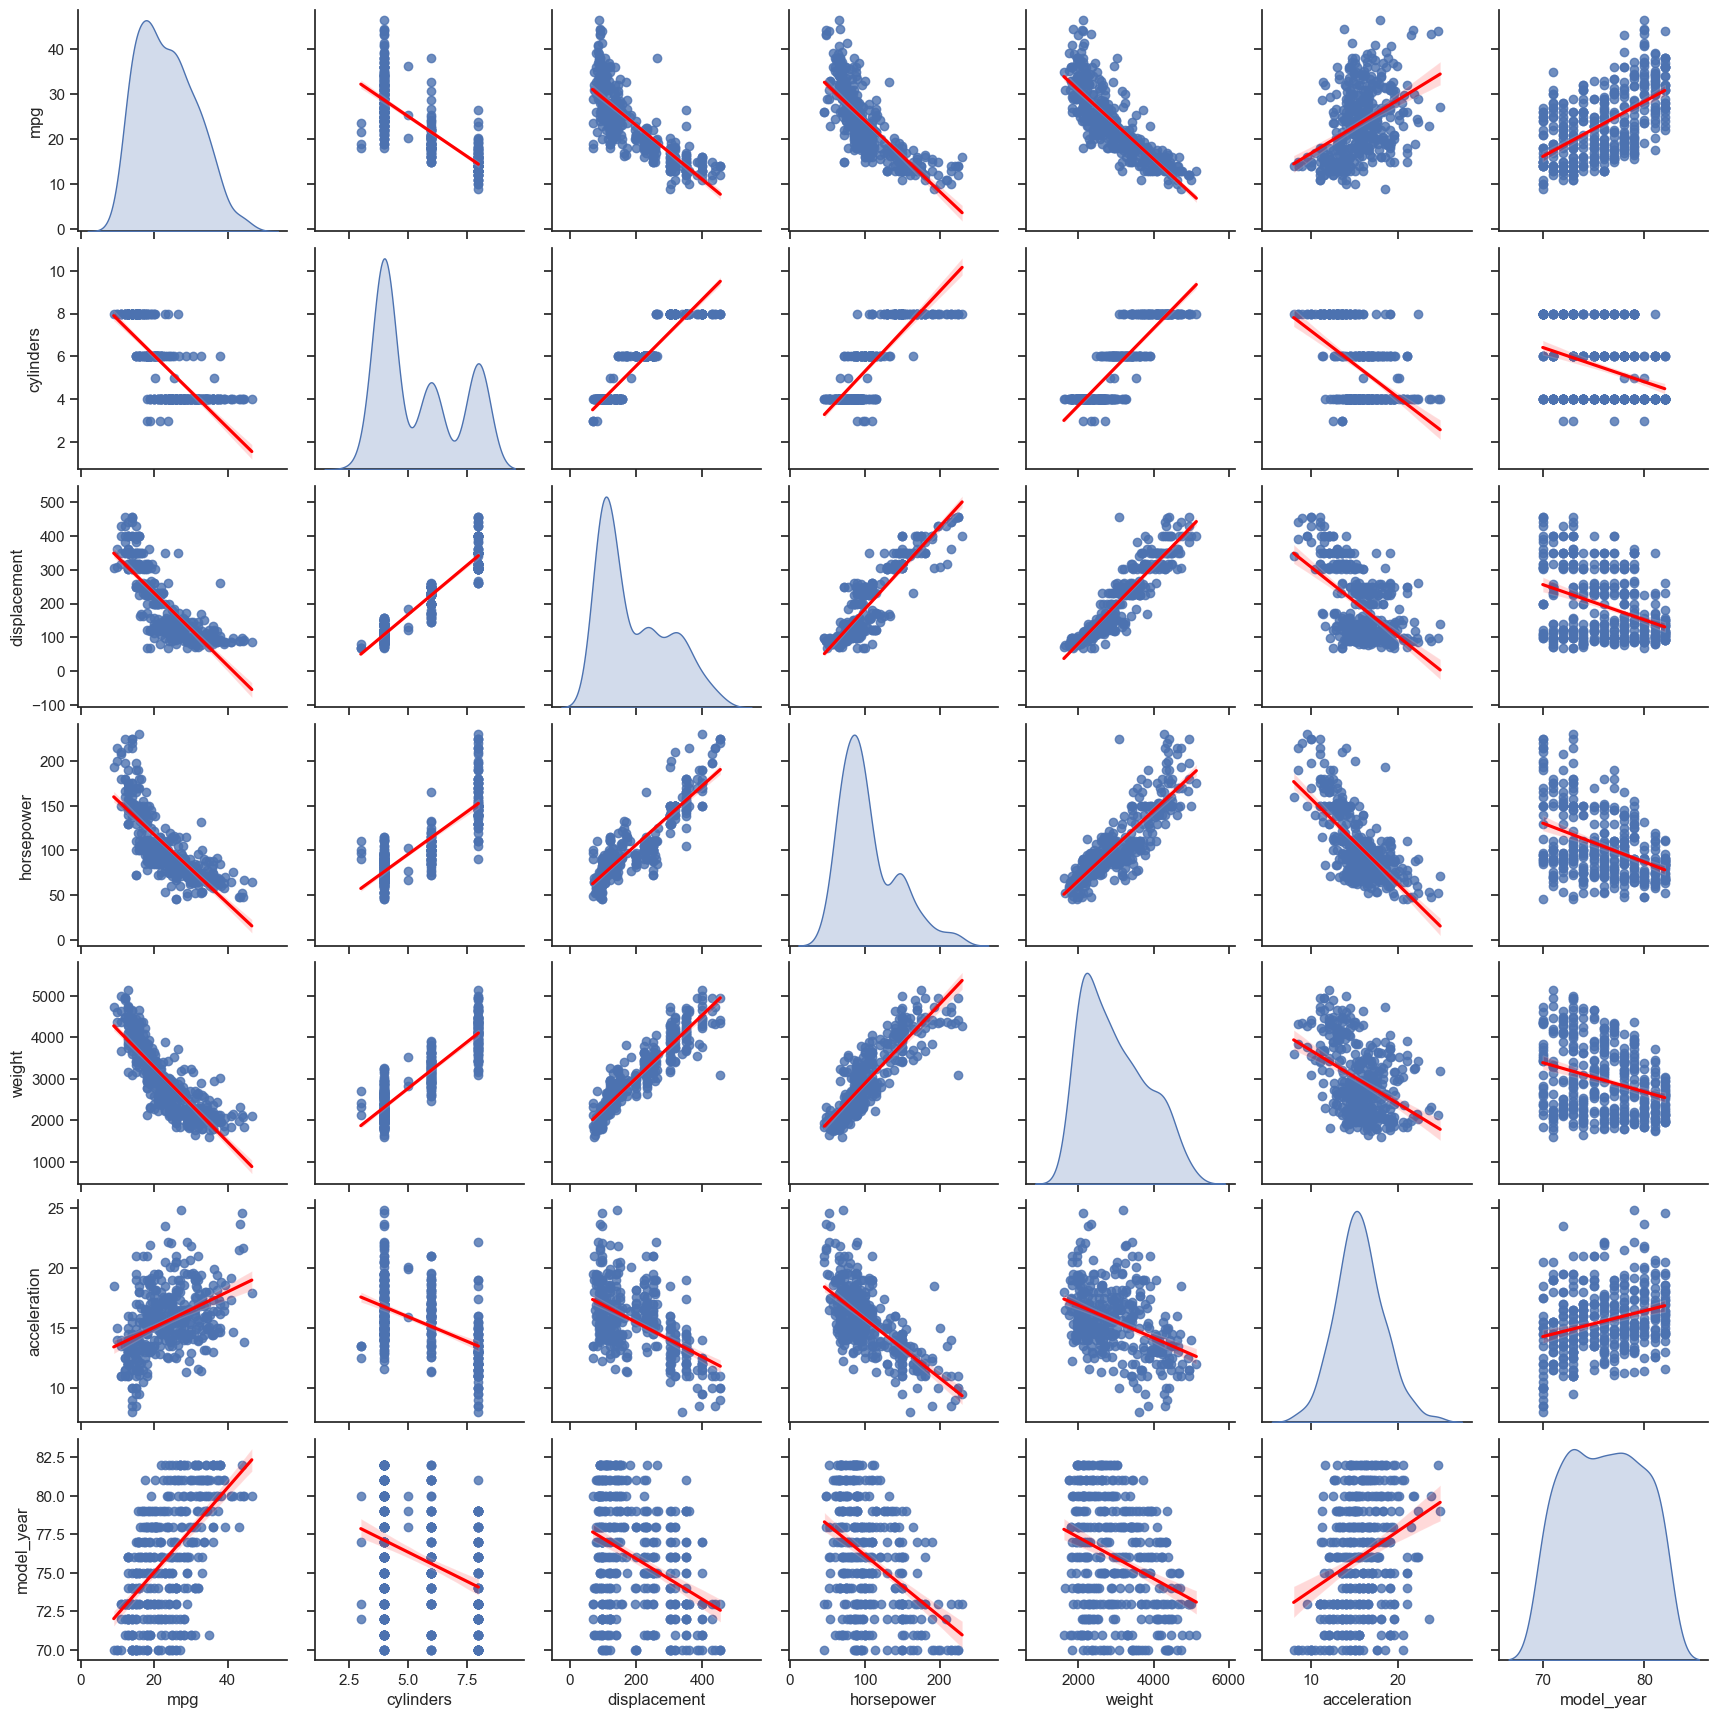

In [23]:
# Get the list of numerical columns
numerical_columns = df.select_dtypes(include="number").columns

# Set the plot style
sns.set(style="ticks", color_codes=True)

# Create a pairplot of scatterplots with a red regression line
sns.pairplot(df[numerical_columns], kind="reg", diag_kind="kde", plot_kws={"line_kws":{"color":"red"}})

# Show the plot
plt.show()

### Heatmap:

- A heatmap is a graphical representation of data that uses **color-coded cells to display the values of a two-dimensional matrix**. Heatmaps are useful for visualizing large datasets and identifying patterns and trends in the data.

Heatmaps are commonly used in data analysis for several purposes, including:

  - **``Identifying correlations``**: Heatmaps can be used to identify correlations between variables in a dataset. High correlations between variables are indicated by cells with similar colors, while low correlations are indicated by cells with dissimilar colors.

  - **``Clustering``**: Heatmaps can be used to cluster similar data points together based on their values. Clusters are indicated by groups of cells with similar colors.

  - **``Data visualization``**: Heatmaps provide a visual representation of large datasets that can be easier to understand than raw data.

  - **``Anomaly detection``**: Heatmaps can be used to identify anomalies or outliers in the data. Anomalies are indicated by cells with colors that are significantly different from the other cells in the matrix.

**How is the correlation matrix of DataFrame at hand, which includes only the numeric columns, visualized using a heatmap in Seaborn?<br>** 
**Additionally, are the numerical values in the cells of the heatmap annotated using the annot parameter?**
- The following code generates a heatmap visualization of the correlation matrix for the numeric columns in the DataFrame.

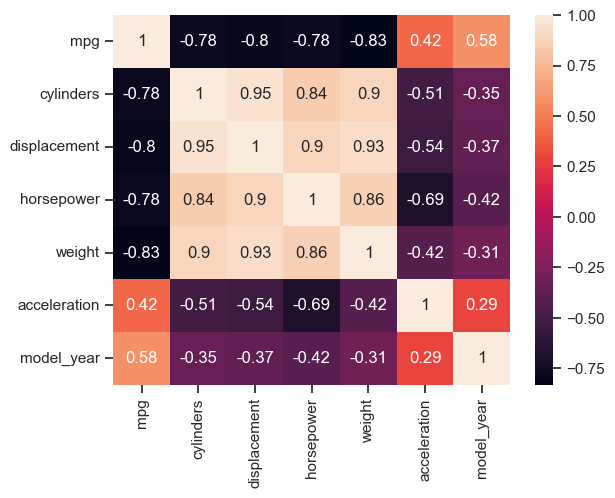

In [24]:
sns.heatmap(df.corr(numeric_only=True), annot=True);

## <p style="background-color:#E51A59; font-family:newtimeroman; color:#FDFEFE; font-size:175%; text-align:center; border-radius:10px 10px;">Normal Distribution & Calculation of Probabilities</p>

### Cumulative Distribution Function (CDF):

- A **``Cumulative Distribution Function (CDF)``** is a function that shows the **<u>cumulative probability of a random variable taking on a certain value or a value less than or equal to it.</u>** The CDF is defined for both continuous and discrete random variables.

<p style="text-align: center;"><img src="https://i.ibb.co/gFFTv42/PDF-CDF.png" class="img-fluid" 
alt="CDF vs PDF" width="400" height="200"></p>

For a **``continuous random variable``** X, the CDF is defined as:

- ``F(x) = P(X ≤ x)``<br>
  - where F(x) is the CDF of X and P(X ≤ x) is the probability that X takes on a value less than or equal to x. The CDF is a non-decreasing function that ranges from 0 to 1.

For a **``discrete random variable``** X, the CDF is defined as:

- ``F(x) = P(X ≤ x) = ∑ P(X = xi)``<br>
  - where F(x) is the CDF of X, P(X ≤ x) is the probability that X takes on a value less than or equal to x, and xi are the possible values that X can take on.

The CDF is useful for several purposes in statistics, including:

  - **``Calculating probabilities``**: The CDF can be used to calculate the probability that a random variable X takes on a value less than or equal to a specified value x.

  - **``Comparing distributions``**: The CDF can be used to compare the distributions of different random variables or the same random variable under different conditions.

  - **``Estimating percentiles``**: The CDF can be used to estimate percentiles of a distribution.

**[scipy.stats.norm](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html)**

In [25]:
import scipy.stats as stats

#### 1. Find "the probability that the standard normal random variable Z is greater than 2" P(Z>2)

``Assumption``: Let Z denote a normal random variable with mean 0 and standard deviation 

<p style="text-align: center;"><img src="https://i.ibb.co/89Q34yp/Z-Score-Table.jpg" class="img-fluid" 
alt="STATS" width="500" height="200"></p>

**[Z Score – Definition and How to Use](https://conversion-uplift.co.uk/glossary-of-conversion-marketing/z-score/)**

**[Z Score Table and Chart (How to use Z-Score)](https://zscoregeek.com/using-z-score-table/)**

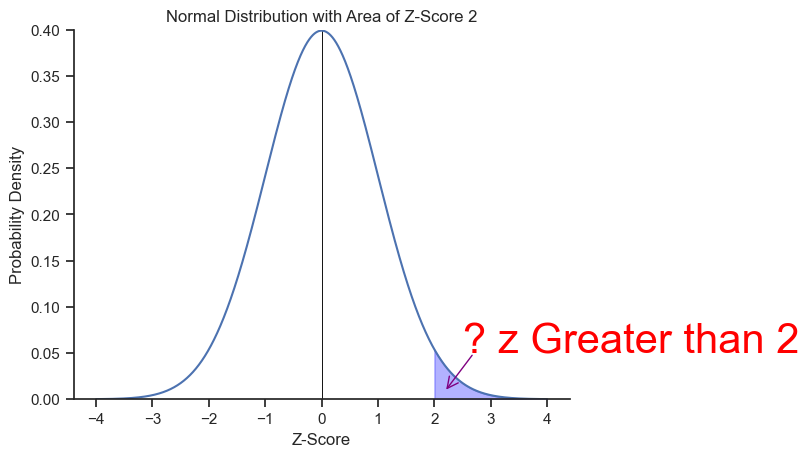

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define the x-axis range
x = np.arange(-4, 4, 0.001)

# Calculate the y-axis values using the normal distribution function
y = norm.pdf(x, 0, 1)

# Shade the area under the curve for the given z-score
plt.fill_between(x[x>=2], y[x>=2], color='blue', alpha=0.3)

# Add a vertical line at the mean of the distribution
plt.axvline(x=0, color='black', linewidth=0.5)

# Add a vertical line at the maximum point of the curve
max_y = np.max(y)
max_x = x[np.argmax(y)]
plt.plot([max_x, max_x], [0, max_y], color='black', linewidth=0.5)

# Add a horizontal line under the curve
plt.axhline(y=0, color='black', linewidth=0.5)

# Set the y-axis limits to show only the region between 0 and 0.4
plt.ylim(0, 0.4)

# Remove the right and top spines
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Add a text annotation
plt.annotate('? z Greater than 2', xy=(2.5, 0.05), fontsize=30, color='red')

# Add labels and title
plt.xlabel('Z-Score')
plt.ylabel('Probability Density')
plt.title('Normal Distribution with Area of Z-Score 2')

# Draw an arrow pointing to the shaded area
arrow_start = (2.7, 0.05)
arrow_end = (2.18, 0.008)
arrow_length = 0.1
arrow_angle = 10
arrow_props = dict(facecolor='red', edgecolor='purple', arrowstyle='->', mutation_scale=20)
plt.annotate('', xy=arrow_end, xytext=arrow_start, arrowprops=arrow_props)

# Show the plot
plt.plot(x, y)
plt.show()

In [27]:
stats.norm.cdf(2)

0.9772498680518208

In [28]:
1 - stats.norm.cdf(2)

0.02275013194817921

In [29]:
stats.norm.cdf(0)

0.5

In [30]:
stats.norm.cdf(2) - stats.norm.cdf(0)

0.4772498680518208

**Let's focus on another z-score of 1.5:**

#### 2. Find "the probability that the standard normal random variable Z is greater than 1.5" P(Z>1.5)

``Assumption``: Let Z denote a normal random variable with mean 0 and standard deviation 

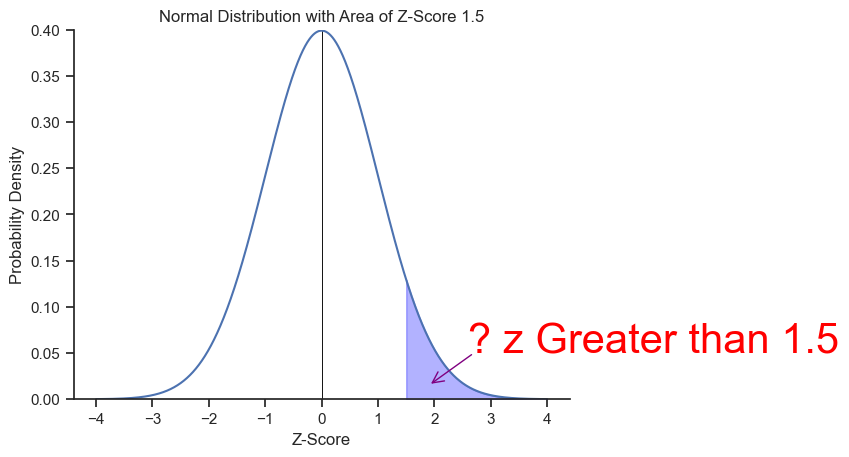

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define the x-axis range
x = np.arange(-4, 4, 0.001)

# Calculate the y-axis values using the normal distribution function
y = norm.pdf(x, 0, 1)

# Shade the area under the curve for the given z-score
plt.fill_between(x[x>=1.5], y[x>=1.5], color='blue', alpha=0.3)

# Add a vertical line at the mean of the distribution
plt.axvline(x=0, color='black', linewidth=0.5)

# Add a vertical line at the maximum point of the curve
max_y = np.max(y)
max_x = x[np.argmax(y)]
plt.plot([max_x, max_x], [0, max_y], color='black', linewidth=0.5)

# Add a horizontal line under the curve
plt.axhline(y=0, color='black', linewidth=0.5)

# Set the y-axis limits to show only the region between 0 and 0.4
plt.ylim(0, 0.4)

# Remove the right and top spines
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Add a text annotation
plt.annotate('? z Greater than 1.5', xy=(2.6, 0.05), fontsize=30, color='red')

# Draw an arrow pointing to the shaded area
arrow_start = (2.7, 0.05)
arrow_end = (1.9, 0.015)
arrow_length = 0.05
arrow_angle = 10
arrow_props = dict(facecolor='red', edgecolor='purple', arrowstyle='->', mutation_scale=20)
plt.annotate('', xy=arrow_end, xytext=arrow_start, arrowprops=arrow_props)

# Add labels and title
plt.xlabel('Z-Score')
plt.ylabel('Probability Density')
plt.title('Normal Distribution with Area of Z-Score 1.5')

# Show the plot
plt.plot(x, y)
plt.show()

In [32]:
stats.norm.cdf(1.5)

0.9331927987311419

In [33]:
1 - stats.norm.cdf(1.5)

0.06680720126885809

In [34]:
stats.norm.cdf(1.5) - stats.norm.cdf(0)

0.4331927987311419

### Percent Point Function (PPF):

- The **``Percent Point Function (PPF)``** is the **``inverse of the Cumulative Distribution Function (CDF)``** of a random variable. The PPF, also known as the ``Quantile Function`` or ``Inverse CDF``, **<u>returns the value of the random variable for which the probability of the random variable being less than or equal to that value is equal to a specified probability.</u>**

<p style="text-align: center;"><img src="https://i.ibb.co/KqRzvkn/ppf-cdf.png" class="img-fluid" 
alt="CDF vs PPF" width="400" height="200"></p>

For a **``continuous random variable``** X, the PPF is defined as:
- ``x = F^(-1)(p)``<br>
  - where x is the value of X for which the probability of X being less than or equal to x is equal to the specified probability p, and F^(-1) is the inverse function of the CDF.

For a **``discrete random variable``** X, the PPF is defined as:

- ``x = inf { xi : P(X ≤ xi) ≥ p }``<br>
  - where xi are the possible values that X can take on, and inf denotes the infimum or greatest lower bound of the set.

The PPF is useful for several purposes in statistics, including:

  - **``Calculating percentiles``**: The PPF can be used to calculate the value of a random variable at a specified percentile of the distribution.

  - **``Generating random samples``**: The PPF can be used to generate random samples from a specified distribution.

  - **``Hypothesis testing``**: The PPF can be used to test hypotheses about the value of a random variable.

#### 1. What is the value of the percent point function for a cumulative density of 0.95?

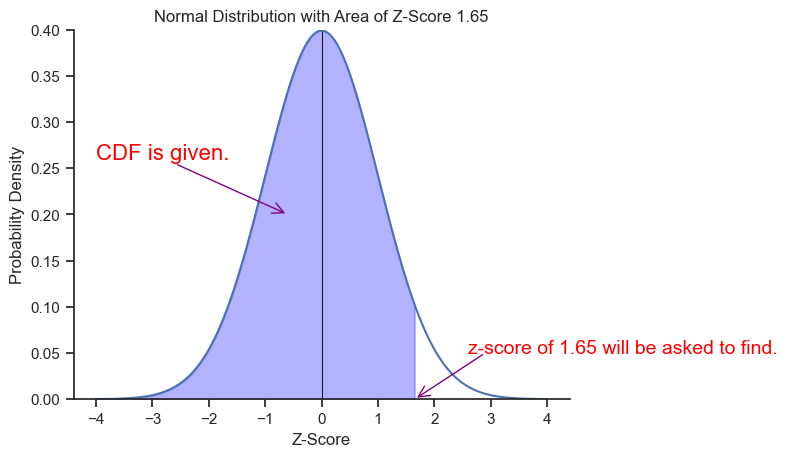

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define the x-axis range
x = np.arange(-4, 4, 0.001)

# Calculate the y-axis values using the normal distribution function
y = norm.pdf(x, 0, 1)

# Shade the area under the curve for the given z-score
plt.fill_between(x[x<=1.65], y[x<=1.65], color='blue', alpha=0.3)

# Add a vertical line at the mean of the distribution
plt.axvline(x=0, color='black', linewidth=0.5)

# Add a vertical line at the maximum point of the curve
max_y = np.max(y)
max_x = x[np.argmax(y)]
plt.plot([max_x, max_x], [0, max_y], color='black', linewidth=0.5)

# Add a horizontal line under the curve
plt.axhline(y=0, color='black', linewidth=0.5)

# Set the y-axis limits to show only the region between 0 and 0.4
plt.ylim(0, 0.4)

# Remove the right and top spines
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Add a text annotation
plt.annotate('CDF is given.', xy=(-4, 0.26), fontsize=16, color='red')
plt.annotate('z-score of 1.65 will be asked to find.', xy=(2.6, 0.05), fontsize=14, color='red')

# Draw the second arrow pointing to the z-score of 1.65
arrow_start = (2.9, 0.05)
arrow_end = (1.65, 0)
arrow_length = 0.1
# arrow_angle = 10
arrow_props = dict(facecolor='red', edgecolor='purple', arrowstyle='->', mutation_scale=20)
plt.annotate('', xy=arrow_end, xytext=arrow_start, arrowprops=arrow_props)

# Draw the first arrow pointing to the shaded area
arrow_start = (-2.6, 0.255)
arrow_end = (-0.6, 0.2)
arrow_length = 0.5
# arrow_angle = 40
arrow_props = dict(facecolor='red', edgecolor='purple', arrowstyle='->', mutation_scale=20)
plt.annotate('', xy=arrow_end, xytext=arrow_start, arrowprops=arrow_props)

# Add labels and title
plt.xlabel('Z-Score')
plt.ylabel('Probability Density')
plt.title('Normal Distribution with Area of Z-Score 1.65')

# Show the plot
plt.plot(x, y)
plt.show()

**[scipy.stats.norm](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html)**

- ``ppf(q, loc=0, scale=1) Percent point function (inverse of cdf — percentiles)``

  - **``q``** represents the probability or cumulative distribution function (CDF) value for which we want to find the corresponding quantile or point on the distribution.

The **``percent point function (PPF)``** is the **``inverse of the cumulative distribution function (CDF)``**, which takes a probability value as input and returns the corresponding quantile or point on the distribution. In other words, if q is a probability value between 0 and 1, then scipy.stats.norm.ppf(q, loc=0, scale=1) will return the z-score or value on the standard normal distribution that has a cumulative probability of q.

``For example, if we want to find the z-score that corresponds to the 95th percentile of the standard normal distribution, we can use scipy.stats.norm.ppf(0.95, loc=0, scale=1), which will return approximately 1.645. This means that the value on the standard normal distribution that corresponds to a cumulative probability of 0.95 is a z-score of 1.645.``

**``BE CAREFUL:``** While the z-score and the standard deviation score both measure the distance of a data point from the mean, they are measuring this distance in different units. The z-score is measuring this distance in standard units, while the standard deviation score is measuring this distance in the units of the original distribution.

In [36]:
stats.norm.ppf(0.95)

1.6448536269514722

**Let's confirm this value of PPF with CDF:**

In [37]:
stats.norm.cdf(1.6448536269514722)

0.95

**What about the probability area on the inverse tail?**

In [38]:
stats.norm.ppf(0.05)

-1.6448536269514729

<p style="text-align: center;"><img src="https://i.ibb.co/1mkLDF1/all-z-score-selected.png" class="img-fluid" 
alt="STATS" width="400" height="200"></p>

The empirical rule, also known as the 68-95-99.7 rule, states that for a normal distribution:

  - Approximately 68% of the observations fall within one standard deviation of the mean.
  - Approximately 95% of the observations fall within two standard deviations of the mean.
  - Approximately 99.7% of the observations fall within three standard deviations of the mean.
  
Therefore, if we assume a normal distribution, approximately 95% of the observations will fall between -2 and +2 standard deviations from the mean. 

### 🤔 So, what happens in the following output? (When considering the Emperical Rule on Normal Distribution)

<p style="text-align: center;"><img src="https://i.ibb.co/bNy0LJZ/empirical-rule.png" class="img-fluid" 
alt="STATS" width="500" height="200"></p>

In [39]:
stats.norm.cdf(2)

0.9772498680518208

In [40]:
stats.norm.ppf(0.9772498680518208)

2.0000000000000004

🤔 **The standard normal distribution with a value of 2 in the empirical rule covers approximately 95.44% of the data, but stats.norm.cdf(2) gave a value of 0.9772498680518208. Why is there a discrepancy between the empirical rule and the precise CDF calculation?**

The discrepancy between the empirical rule and the CDF (cumulative distribution function) value for the standard normal distribution at a value of 2 is due to the nature of the empirical rule and the precise mathematical calculation of the CDF.

The empirical rule, also known as the 68-95-99.7 rule, is a general guideline that states:

- Approximately 68% of the data falls within 1 standard deviation of the mean.
- Approximately 95% of the data falls within 2 standard deviations of the mean.
- Approximately 99.7% of the data falls within 3 standard deviations of the mean.

This rule provides a rough estimate of the distribution of data under a standard normal distribution. However, it is an approximation and not an exact mathematical calculation.

On the other hand, the CDF function stats.norm.cdf(2) in Python's SciPy library is the precise mathematical calculation of the cumulative probability up to a value of 2 standard deviations from the mean in a standard normal distribution.

The exact value calculated by stats.norm.cdf(2) is 0.9772498680518208, which means that the area under the standard normal curve from negative infinity to 2 standard deviations is approximately 97.72%.

The discrepancy between the 95% covered by the empirical rule and the 97.72% calculated by the CDF function is due to the fact that the empirical rule is an approximation, while the CDF function provides the exact mathematical calculation.

In summary, the empirical rule is a useful guideline, but the CDF function provides the precise probability calculation for a standard normal distribution. The discrepancy between the 95.44% from the empirical rule and the 97.72% from the CDF calculation is due to the fact that the empirical rule is an approximation, while the CDF function provides the exact mathematical probability.

### ⚠️ DO NOT FORGET ⚠️

**How does the probability distribution of a normal distribution with a standard deviation of 2 differ from that of the standard normal distribution?**

The probability distribution of a normal distribution with a standard deviation of 2 is different from that of the standard normal distribution in two ways: the shape of the distribution and the location of the mean and standard deviation.

  - First, the shape of a normal distribution with a standard deviation of 2 is the same as that of the standard normal distribution, which is a bell-shaped curve. However, the curve is wider and flatter than the standard normal distribution, which has a standard deviation of 1. This means that the values in a normal distribution with a standard deviation of 2 are more spread out than those in the standard normal distribution.

  - Second, the mean of a normal distribution with a standard deviation of 2 is not necessarily 0, as it is in the standard normal distribution. The mean can take any value, but it is usually set to a specific value depending on the context of the problem being analyzed. The standard deviation of a normal distribution with a standard deviation of 2 is always 2.

These differences mean that the cumulative probabilities, z-scores, and percentiles for a normal distribution with a standard deviation of 2 are different from those of the standard normal distribution. For example, the z-score that corresponds to the 95th percentile of a normal distribution with a standard deviation of 2 is 1.645, while the z-score that corresponds to the 95th percentile of the standard normal distribution is also 1.645. However, the values on the x-axis that correspond to a given z-score are different for the two distributions.

**"What are the differences between the standard normal distribution and a normal distribution?"**

The differences between the standard normal distribution and a normal distribution are as follows:

- ``Mean and standard deviation``: The mean of the standard normal distribution is 0 and its standard deviation is 1, while a normal distribution can have different mean and standard deviation values.

- ``Normalization``: The standard normal distribution is a normalized distribution. This means that the data from any normal distribution can be converted into its standard normal equivalent by subtracting the mean and dividing by the standard deviation. This makes it easier to compare and analyze different normal distributions.

- ``Simplification``: The standard normal distribution is used to simplify mathematical calculations. For example, standard normal distribution tables make it possible to find the probabilities corresponding to z-scores without calculating the integral of the cumulative distribution function.

- ``Z-scores``: The standard normal distribution allows for the calculation of z-scores. Z-scores measure how many standard deviations a data point is away from the mean of its own distribution. This can help compare and analyze different normal distributions.

- ``Probability distribution``: The probability distribution of a normal distribution varies depending on its mean and standard deviation, while the probability distribution of the standard normal distribution is constant.

<hr>

## <p style="background-color:#E51A59; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">END OF THE SESSION-03</p>

## <p style="background-color:#FFFFFF; font-family:newtimeroman; color:#0000FF; font-size:150%; text-align:center; border-radius:10px 10px;">Now. it's time to relax!</p>

<img align="center" src="https://i.ibb.co/RhkT55q/relaxing.jpg" width="800" height="200">

<p style="text-align: center;"><img src="https://i.ibb.co/99DQ3TY/DS-Courses.png" class="img-fluid" 
alt="CLRSWY"></p>

___

<a href="https://clarusway.com/"><img align="center" src="https://i.ibb.co/Rpz9L36/clarusway-logo-black.png" width="450" height="200" alt="CLRSWY_LOGO" title="Way to Reinvent Yourself"></a><br/>

<p style="background-color:#E51A59; font-family:newtimeroman; color:#FDFEFE; font-size:130%; text-align:center; border-radius:10px 10px;">WAY TO REINVENT YOURSELF</p>

<hr>

<a href="https://clarusway.com/contact-us/"><img align="center" src="https://i.ibb.co/B43qn24/officially-licensed-logo.png" alt="Open in Clarusway LMS" width="110" height="200" title="This notebook is licensed by Clarusway IT training school. Please contact the authorized persons about the conditions under which you can use or share."></a>